# Multiple Linear Regression

In this notebook linear regression containing multiple variables will be examined. One method of expanding upon a simple linear model is to use it multiple times comparing each variable to another. However this is impractical and can lead to misleading results because each model doesn't take into account the other ones. Therefore multiple linear regression uses a linear combination of parameters to fit a regression:

\begin{equation*}
y = \theta_0 + \theta_1 X_1 + \theta_1 X_2+ ... + \theta_p X_p+\epsilon
\end{equation*}

We can start by generating and visualising data:

In [46]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=5)

In [50]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
z = 3*x + y + np.random.randn(100,1)

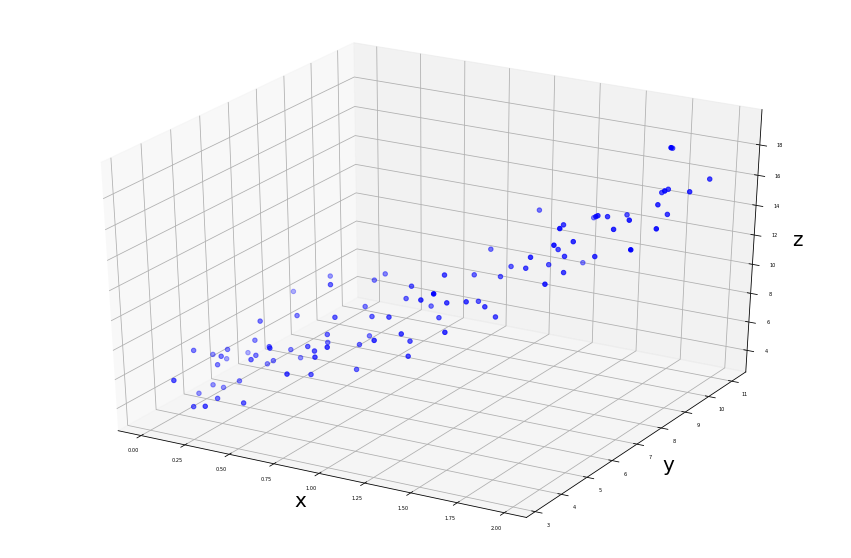

In [51]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='b')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Estimating the Coefficients

### Ordinary Least Squares

Getting the coefficients for the multiple linear regression is done using the same techniques from the [Simple Linear Regression](http://localhost:8888/notebooks/Simple%20Linear%20Regression.ipynb). We will use the normal equation for this example:

In [146]:
x_b = np.c_[ np.ones(( 100, 1)), x] # add bias vector of 1s
X = np.c_[x_b,y]

theta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(z)
theta_hat

array([[0.14679242],
       [3.08025159],
       [0.97281755]])

This seems reasonable since we know that $z=3x+y$. Now we can plot th plane using the values for $\theta$ (it can also be done with dot products):

In [151]:
x_new = np.linspace(0,2,100) #generate values for x to plot
y_new = np.linspace(3,12,100)

x_new_mesh,y_new_mesh = np.meshgrid(x_new,y_new)
z_new_mesh=theta_hat[0][0] +theta_hat[1][0]*x_new_mesh + theta_hat[2][0]*y_new_mesh #use expanded dot product

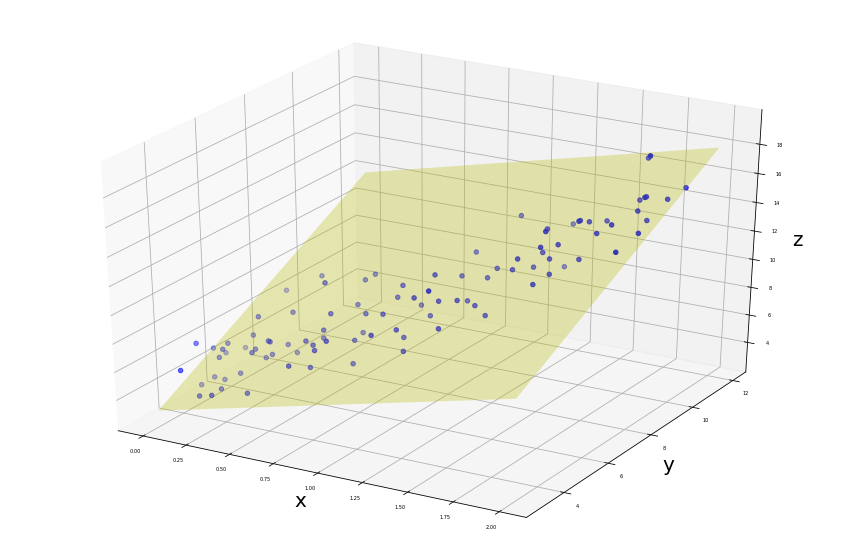

In [158]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='b')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(x_new_mesh, y_new_mesh, z_new_mesh, alpha=0.3,color='y')
plt.show()